## 案例1：给定一个二维数据集，使用kmeans进行聚类
## 数据集：data/ex7data2.mat

In [37]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

### 1.读取数据

In [38]:
data1 = sio.loadmat('./data/ex7data2.mat')
data1.keys()

dict_keys(['X', '__version__', '__header__', '__globals__'])

In [39]:
X = data1['X']
X.shape

(300, 2)

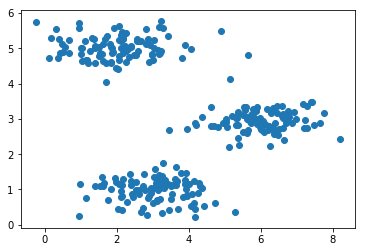

In [40]:
plt.scatter(X[:,0],X[:,1])
plt.show()

### 2.Kmeans算法
#### 2.1获取每个样本所属类别

In [41]:
# 即：计算每个点距离哪个中心最近，就给他对应的分类序号
def find_centroids(X,centros):
    idx = []
    for i in range(len(X)):
        # X[i]是(2,)维；centros是(k,2)维  -> (k,2)
        # np.linalg.norm计算l2范数,axis=1计算方向，列项
        dist = np.linalg.norm((X[i]-centros),axis=1) # (k,)
        # np.argmin获取最小值的索引
        id_i = np.argmin(dist)
        idx.append(id_i)
    return np.array(idx)

In [42]:
# 初始化K值，即中心
centros = np.array([[3,3],[6,2],[8,5]])
# 计算第一次分类，每个点对应的类别
idx = find_centroids(X,centros)
idx[:3]

array([0, 2, 1], dtype=int64)

In [43]:
idx.shape

(300,)

#### 2.2计算聚类中心点

In [44]:
# 即：移动聚类中心
def compute_centros(X,idx,k):
    centros = []
    for i in range(k):
        centros_i = np.mean(X[idx==i],axis=0)
        centros.append(centros_i)
        
    return np.array(centros)

In [45]:
# 第一次移动聚类中心的位置
compute_centros(X,idx,k=3)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

#### 2.3 运行kmeans，重复执行2.1和2.2

In [46]:
def run_kmeans(X,centros,iters):
    k = len(centros)
    centros_all = []
    centros_all.append(centros)
    centros_i = centros
    for i in range(iters):
        idx = find_centroids(X,centros_i)
        centros_i = compute_centros(X,idx,k)
        centros_all.append(centros_i)
        
    return idx,np.array(centros_all)

### 3.绘制数据集和聚类中心的移动轨迹

In [47]:
def plot_data(X,centros_all,idx):
    plt.figure()
    plt.scatter(X[:,0],X[:,1],c=idx,cmap='rainbow')
    plt.plot(centros_all[:,:,0],centros_all[:,:,1],'kx--')

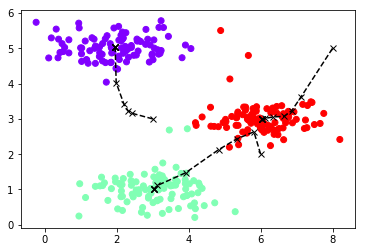

In [48]:
idx,centros_all = run_kmeans(X,centros,iters=10)
plot_data(X,centros_all,idx)
plt.show()

### 4.观察初始聚类点的位置对聚类效果的影响

In [49]:
# 从存在的数据点中，随机初始化中心
def init_centros(X,k):
    index = np.random.choice(len(X),k)
    return X[index]

In [50]:
init_centros(X,k=3)

array([[0.10511804, 4.72916344],
       [1.12993856, 0.77085284],
       [2.04974595, 5.6241395 ]])

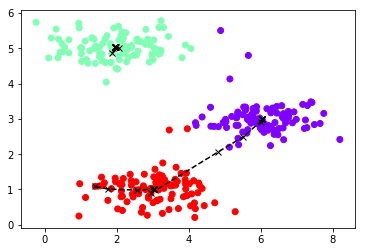

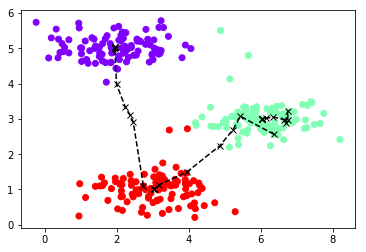

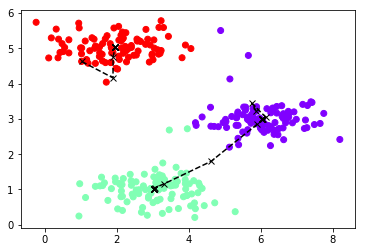

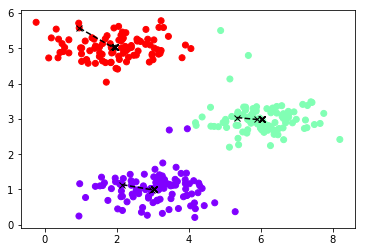

In [51]:
for i in range(4):
    idx,centros_all = run_kmeans(X,init_centros(X,k=3),iters=10)
    plot_data(X,centros_all,idx)
    plt.show()

## 案例2：使用kmeans对图片颜色进行聚类
## RGB图像，每个像素点值范围 0-255
## 数据集：data/bird_small.mat      data/bird_small.png

### 1.读取数据

In [52]:
data = sio.loadmat('./data/bird_small.mat')
data.keys()

dict_keys(['A', '__version__', '__header__', '__globals__'])

In [53]:
A = data['A']
A.shape

(128, 128, 3)

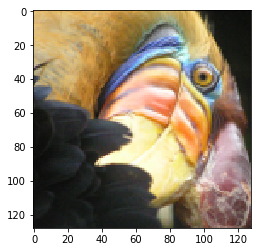

In [54]:
from skimage import io
image = io.imread('./data/bird_small.png')
plt.imshow(image)
plt.show()

In [55]:
# 对数据进行归一化
A = A / 255
# -1代表的是占位吧??????
A = A.reshape(-1,3)
A.shape

(16384, 3)

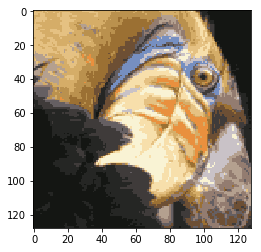

In [56]:
# 使用16中颜色对原图片进行重构
k = 16
idx,centros_all = run_kmeans(A,init_centros(A,k=16),iters=20)
centros = centros_all[-1]
im = np.zeros(A.shape)
for i in range(k):
    im[idx==i] = centros[i]
im = im.reshape(128,128,3)
plt.imshow(im)
plt.show()

In [59]:
centros_all.shape

(21, 16, 3)

In [60]:
centros.shape

(16, 3)